In [91]:
import pandas as pd
import matplotlib.pyplot as plt

from references.state_mapping import STATE_DISTRICT_MAPPING

pd.set_option("display.max_columns", 50)
pd.set_option("display.float_format", "{:,.2f}".format)

In [92]:
raw = pd.read_csv("data/processed/readable_transaction_01_09_2025.csv", na_values=["","-","   "])
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383584 entries, 0 to 383583
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Property Type                    383584 non-null  object 
 1   District                         383584 non-null  object 
 2   Mukim                            383584 non-null  object 
 3   Scheme Name/Area                 383584 non-null  object 
 4   Road Name                        283469 non-null  object 
 5   Month, Year of Transaction Date  383584 non-null  object 
 6   Tenure                           383584 non-null  object 
 7   Land/Parcel Area                 383584 non-null  float64
 8   Unit                             383584 non-null  object 
 9   Main Floor Area                  283477 non-null  float64
 10  Unit                             283477 non-null  object 
 11  Unit Level                       383584 non-null  object 
 12  Tr

In [93]:
# Formatting/Cleaning Column Names
cols = raw.columns.str.strip().str.replace(" ","_").str.lower().str.replace(",","").str.replace("/","_or_")
print(cols)
data = raw.copy()
data.columns = cols
data.sample()

Index(['property_type', 'district', 'mukim', 'scheme_name_or_area',
       'road_name', 'month_year_of_transaction_date', 'tenure',
       'land_or_parcel_area', 'unit', 'main_floor_area', 'unit', 'unit_level',
       'transaction_price'],
      dtype='object')


,property_type,district,mukim,scheme_name_or_area,road_name,month_year_of_transaction_date,tenure,land_or_parcel_area,unit,main_floor_area,unit,unit_level,transaction_price
260690,Condominium/Apartment,Kinta,Ulu Kinta,PRIMA MERU,NaN,1/1/2021,Freehold,105.00,sq.m,NaN,NaN,7,221000


In [94]:
# Rename some columns
data = data.rename(columns={"month_year_of_transaction_date": "date", "transaction_price": "price"})

In [95]:
# Inspecting `unit` column 
print(data.iloc[:,8].unique())
print(data.iloc[:,10].unique())

# Dropping unit column as they are the same with the exception of missing data denoted by `-`
data = data.drop(columns="unit")
data.info()

['sq.m']
['sq.m' nan]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383584 entries, 0 to 383583
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   property_type        383584 non-null  object 
 1   district             383584 non-null  object 
 2   mukim                383584 non-null  object 
 3   scheme_name_or_area  383584 non-null  object 
 4   road_name            283469 non-null  object 
 5   date                 383584 non-null  object 
 6   tenure               383584 non-null  object 
 7   land_or_parcel_area  383584 non-null  float64
 8   main_floor_area      283477 non-null  float64
 9   unit_level           383584 non-null  object 
 10  price                383584 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 32.2+ MB


In [96]:
# Missing data analysis
print(data.isna().sum())
rows_missing = data[data.isna().any(axis=1)]
rows_missing.sample(5)

property_type               0
district                    0
mukim                       0
scheme_name_or_area         0
road_name              100115
date                        0
tenure                      0
land_or_parcel_area         0
main_floor_area        100107
unit_level                  0
price                       0
dtype: int64


,property_type,district,mukim,scheme_name_or_area,road_name,date,tenure,land_or_parcel_area,main_floor_area,unit_level,price
279962,Condominium/Apartment,Manjung,Lumut,PANGSAPURI SAMUDERA (TMN SAMUDERA BARU),NaN,1/1/2022,Freehold,89.00,NaN,1,235000
280712,Condominium/Apartment,Melaka Tengah,Bertam,CHENG MUTIARA BUSINESS PARK,NaN,1/10/2022,Freehold,103.00,NaN,9,335000
260932,Condominium/Apartment,Kinta,Ulu Kinta,PRIMA MERU,NaN,1/6/2024,Freehold,105.00,NaN,6,265000
295716,Condominium/Apartment,Seberang Perai Utara,Butterworth,SEA VIEW TOWER,NaN,1/8/2022,Freehold,119.00,NaN,14,450000
254328,Condominium/Apartment,Johor Bahru,Bandar Johor Bahru,SURIAMAS APARTMENT,NaN,1/6/2024,Leasehold,120.00,NaN,9,550000


In [97]:
# The rows with missing data are typically multi level apartments, the roads are also likely shared. 
# The missing data likely will have minial impact on the analysis.
rows_missing.property_type.unique()

array(['1 - 1 1/2 Storey Terraced', 'Condominium/Apartment', 'Detached',
       'Flat', 'Low-Cost Flat', 'Town House'], dtype=object)

In [98]:
data["district"].unique()

array(['Alor Gajah', 'Bachok', 'Bagan Datuk', 'Bahagian Betong',
       'Bahagian Bintulu', 'Bahagian Kapit', 'Bahagian Kuching',
       'Bahagian Limbang', 'Bahagian Miri', 'Bahagian Mukah',
       'Bahagian Samarahan', 'Bahagian Sarikei', 'Bahagian Serian',
       'Bahagian Sibu', 'Bahagian Sri Aman', 'Baling', 'Bandar Baru',
       'Barat Daya', 'Batang Padang', 'Batu Pahat', 'Beaufort', 'Bentong',
       'Bera', 'Besut', 'Cameron Highland', 'Dungun', 'Gombak',
       'Gua Musang', 'Hilir Perak', 'Hulu Langat', 'Hulu Perak',
       'Hulu Selangor', 'Hulu Terengganu', 'Jasin', 'Jelebu', 'Jeli',
       'Jempol', 'Jerantut', 'Johor Bahru', 'Kampar', 'Kemaman',
       'Keningau', 'Kerian', 'Kinta', 'Klang', 'Kluang', 'Kota Bahru',
       'Kota Belud', 'Kota Kinabalu', 'Kota Marudu', 'Kota Setar',
       'Kota Tinggi', 'Kuala Kangsar', 'Kuala Krai', 'Kuala Langat',
       'Kuala Lumpur', 'Kuala Muda', 'Kuala Nerus', 'Kuala Pilah',
       'Kuala Selangor', 'Kuala Terengganu', 'Kuantan', '

In [99]:
# Renaming `RoMPin` in district column to `Rompin`
print(data.query("district == 'RoMPin'").head(2))
data["district"] = data["district"].replace("RoMPin", "Rompin")

         property_type district   mukim  scheme_name_or_area        road_name  \
376384  Low-Cost House   RoMPin   Bebar  PPR(M) DESA CEMPAKA     DESA CEMPAKA   
376385  Low-Cost House   RoMPin   Bebar  PPR(M) DESA CEMPAKA  JALAN CEMPAKA 1   

            date     tenure  land_or_parcel_area  main_floor_area unit_level  \
376384  1/5/2022  Leasehold               122.00            63.00              
376385  1/5/2022  Leasehold               122.00            63.00              

         price  
376384  120000  
376385  140000  


In [100]:
data.query("district == 'Rompin'").sample(5)

,property_type,district,mukim,scheme_name_or_area,road_name,date,tenure,land_or_parcel_area,main_floor_area,unit_level,price
376441,Low-Cost House,Rompin,Rompin,TAMAN NUSA PUTERI,LORONG NUSA PUTRI,1/4/2022,Leasehold,102.00,67.00,,60000
376444,Low-Cost House,Rompin,Rompin,TAMAN NUSA PUTERI,LORONG NUSA PUTRI 3,1/9/2022,Leasehold,102.00,68.00,,60000
376452,Low-Cost House,Rompin,Rompin,TAMAN NUSA PUTERI,LRG NUSA PUTERI 13,1/2/2023,Leasehold,102.00,67.00,,60000
92977,1 - 1 1/2 Storey Terraced,Rompin,Endau,PERUMAHAN GEN BAHARU FELDA SELENDANG 2,JALAN FELDA SELENDANG 7,1/4/2022,Leasehold,282.00,76.00,,108000
17156,1 - 1 1/2 Storey Semi-Detached,Rompin,Endau,"P/LOT 27634 & 27635, TANJUNG GEMOK",JLN ROMPIN/ENDAU,1/11/2024,Freehold,282.00,94.00,,475000


In [101]:
state = data["district"].map(STATE_DISTRICT_MAPPING)
data.insert(1,"state",state)
data.sample(5)

,property_type,state,district,mukim,scheme_name_or_area,road_name,date,tenure,land_or_parcel_area,main_floor_area,unit_level,price
149121,2 - 2 1/2 Storey Terraced,Johor,Johor Bahru,Plentong,TMN SCIENTEX,JLN KENARI 21,1/4/2023,Freehold,196.00,101.00,,480000
60434,1 - 1 1/2 Storey Terraced,Selangor,Kuala Langat,Tanjung 12,TAMAN LANGAT UTAMA 3,JALAN LG3 1/45,1/6/2023,Leasehold,121.00,77.00,,225000
308452,Detached,Kelantan,Kota Bahru,Lundang Paku,KG. BELUKAR,OFF JALAN BETA HULU - LUNDANG,1/6/2022,Freehold,489.00,105.00,,300000
381332,Town House,Selangor,Klang,Kelang,IDAMAN GRAND RESIDENCE/SENTOSA IDAMAN,NaN,1/10/2024,Freehold,112.00,NaN,2,460000
186287,2 - 2 1/2 Storey Terraced,Kedah,Kuala Muda,Bandar Sungai Petani,BANDAR PUTERI JAYA SEK 2,JLN BPJ 2/23,1/5/2023,Freehold,130.00,133.00,,380000


In [ ]:
# Persist the Results
data.to_csv("data/processed/processed_data.csv", index=False)

## Starting Analysis
- mean/median price by state and property type
- tenure and highest property type counts
- transaction counts across time by state, and property type
- correlation between floor area and price

In [103]:
data.describe()

,land_or_parcel_area,main_floor_area,price
count,"383,584.00","283,477.00","383,584.00"
mean,192.62,127.79,"496,467.24"
std,"4,166.07",315.35,"545,792.88"
min,8.27,0.00,"5,000.00"
25%,100.00,80.00,"248,000.00"
50%,130.00,110.00,"370,000.00"
75%,188.00,158.00,"570,000.00"
max,"1,788,888.00","159,390.00","38,000,000.00"


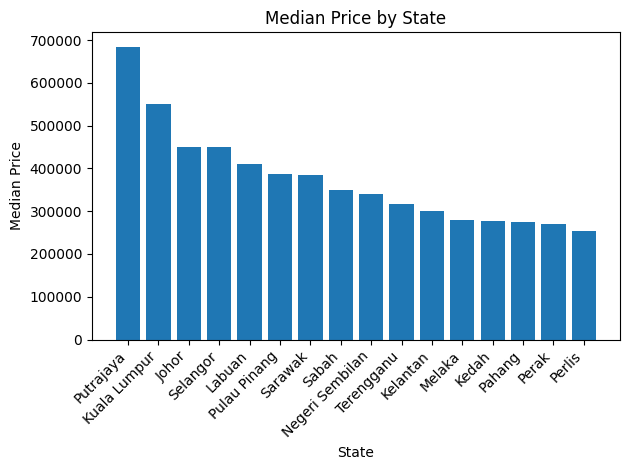

In [104]:
median_price_state = data[["state", "price"]].groupby("state").median().sort_values("price", ascending=False)
plt.bar(median_price_state.index, median_price_state["price"])
plt.xticks(rotation=45, ha="right")  # rotate 45°, align to the right
plt.ylabel("Median Price")
plt.xlabel("State")
plt.title("Median Price by State")
plt.tight_layout()
plt.show()

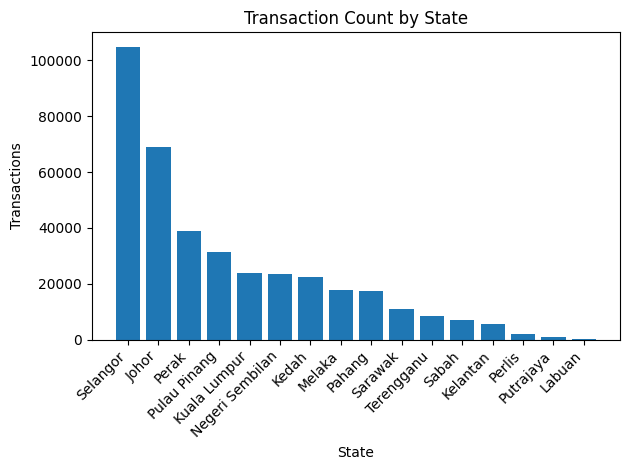

In [105]:
transaction_count_state = data[["state", "price"]].groupby("state").count().sort_values("price", ascending=False)
plt.bar(transaction_count_state.index, transaction_count_state["price"])
plt.xticks(rotation=45, ha="right")  # rotate 45°, align to the right
plt.ylabel("Transactions")
plt.xlabel("State")
plt.title("Transaction Count by State")
plt.tight_layout()
plt.show()

C:\Users\faisa\AppData\Local\Temp\ipykernel_23440\2675027391.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(median_price_state.index, rotation=45, ha="right")


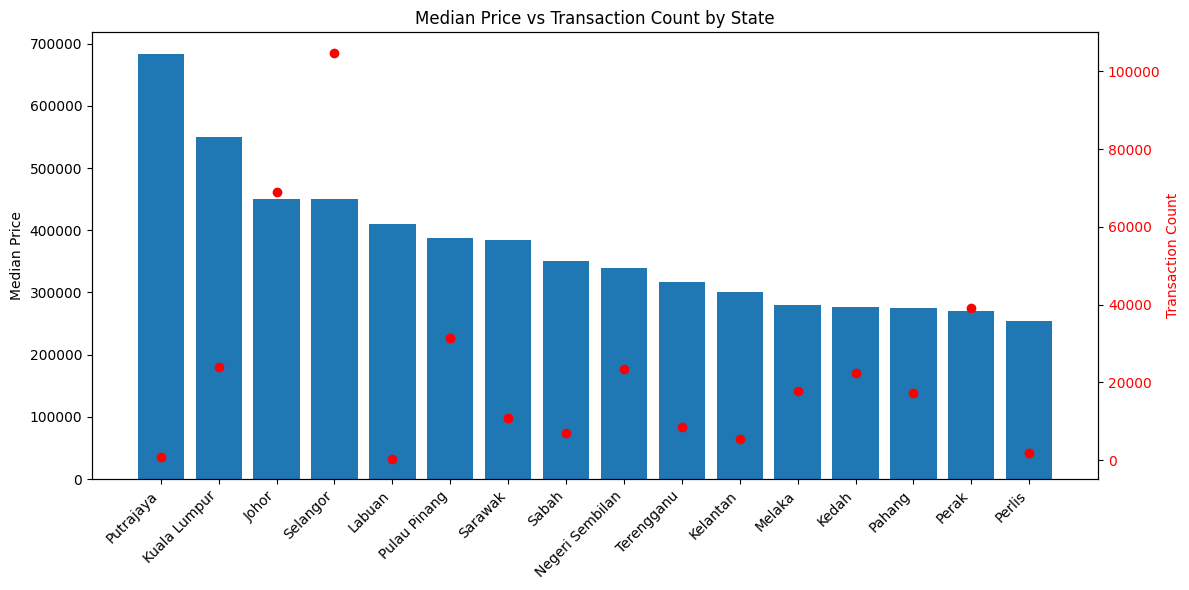

In [106]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(median_price_state.index, median_price_state["price"])
ax1.set_ylabel("Median Price")
ax1.tick_params(axis="y")
ax1.set_xticklabels(median_price_state.index, rotation=45, ha="right")

ax2 = ax1.twinx()
ax2.scatter(transaction_count_state.index, transaction_count_state["price"], color="red", marker="o")
ax2.set_ylabel("Transaction Count", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Median Price vs Transaction Count by State")
plt.tight_layout()
plt.show()